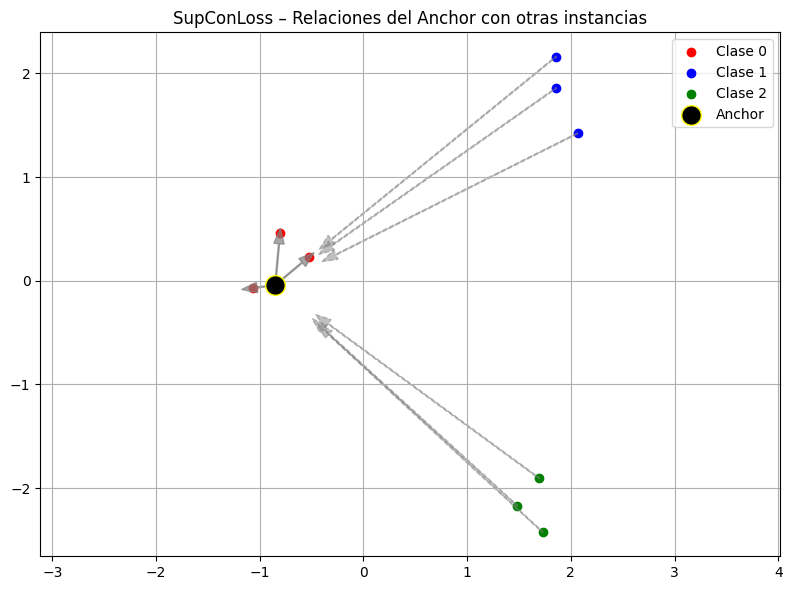

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Configuración
np.random.seed(42)
num_classes = 3
points_per_class = [4, 3, 3]  # 4 de clase 0 (incluyendo el anchor), 3 y 3 de clases 1 y 2

# Colores por clase
colors = ['red', 'blue', 'green']
labels = []

# Generar puntos para cada clase alrededor de distintos centros
centers = [(-1, 0), (2, 2), (2, -2)]
points = []
for class_id, count in enumerate(points_per_class):
    cx, cy = centers[class_id]
    class_points = np.random.randn(count, 2) * 0.3 + np.array([cx, cy])
    points.append(class_points)
    labels.extend([class_id] * count)

points = np.vstack(points)
labels = np.array(labels)

# Seleccionar el punto anchor (primer punto de clase 0)
anchor_idx = 0
anchor_point = points[anchor_idx]

# Crear el gráfico
plt.figure(figsize=(8, 6))

# Dibujar los puntos
for class_id in range(num_classes):
    class_points = points[labels == class_id]
    plt.scatter(class_points[:, 0], class_points[:, 1], label=f'Clase {class_id}', color=colors[class_id])

# Dibujar el anchor
plt.scatter(anchor_point[0], anchor_point[1], color='black', edgecolors='yellow', s=200, label='Anchor', zorder=5)

# Dibujar flechas desde el anchor
for idx, point in enumerate(points):
    if idx == anchor_idx:
        continue
    direction = point - anchor_point
    if labels[idx] == 0:
        # misma clase -> flecha hacia el punto
        plt.arrow(anchor_point[0], anchor_point[1], direction[0]*0.8, direction[1]*0.8,
                  color='gray', width=0.01, head_width=0.1, alpha=0.7)
    else:
        # clase diferente -> flecha desde el punto hacia el anchor
        reverse = -direction
        plt.arrow(point[0], point[1], reverse[0]*0.8, reverse[1]*0.8,
                  color='gray', width=0.01, head_width=0.1, alpha=0.5, linestyle='dashed')

plt.legend()
plt.title("SupConLoss – Relaciones del Anchor con otras instancias")
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()


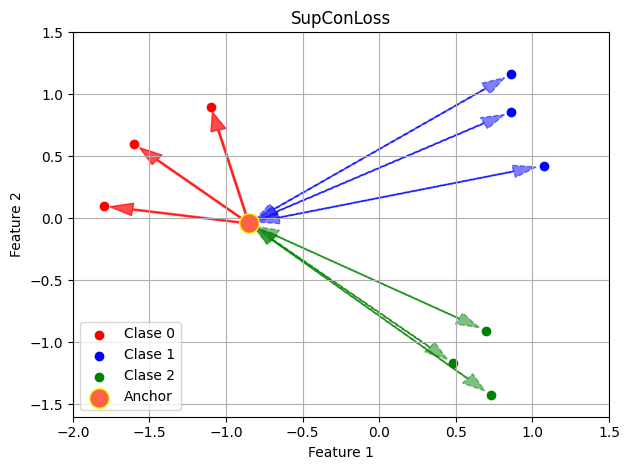

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Configuración
np.random.seed(42)
num_classes = 3
points_per_class = [4, 3, 3]

colors = ['red', 'blue', 'green']
labels = []

# Generar puntos
centers = [(-1, 0), (1, 1), (1, -1)]
points = []
for class_id, count in enumerate(points_per_class):
    cx, cy = centers[class_id]
    class_points = np.random.randn(count, 2) * 0.3 + np.array([cx, cy])
    points.append(class_points)
    labels.extend([class_id] * count)


points = np.vstack(points)
points[1]=[-1.1,0.9]
points[2]=[-1.8,0.1]
points[3]=[-1.6,0.6]
labels = np.array(labels)

# Anchor
anchor_idx = 0
anchor_point = points[anchor_idx]

# Crear gráfico


# Dibujar puntos
for class_id in range(num_classes):
    class_points = points[labels == class_id]
    plt.scatter(class_points[:, 0], class_points[:, 1], label=f'Clase {class_id}', color=colors[class_id])

# Dibujar anchor
plt.scatter(anchor_point[0], anchor_point[1], color='tomato', edgecolors='yellow', s=200, label='Anchor', zorder=5)

# Dibujar flechas
for idx, point in enumerate(points):
    if idx == anchor_idx:
        continue
    direction = point - anchor_point
    if labels[idx] == 0:
        # Misma clase -> flecha desde anchor hacia positivo
        plt.arrow(anchor_point[0], anchor_point[1], direction[0]*0.8, direction[1]*0.8,
                  color='red', width=0.01, head_width=0.1, alpha=0.7)
    else:
        # Clase diferente -> línea con flechas opuestas entre anchor y negativo
        norm_dir = direction / np.linalg.norm(direction)
        offset = norm_dir * 0.2  # para que las flechas no estén justo en el centro
        start1 = anchor_point + offset
        end1 = point - offset
        if labels[idx]==1:
            # Flecha desde anchor hacia punto (repulsión)
            plt.arrow(start1[0], start1[1], (end1 - start1)[0], (end1 - start1)[1],
                    color='blue', width=0.005, head_width=0.1, alpha=0.5, linestyle='dashed')
            # Flecha desde punto hacia anchor (repulsión)
            plt.arrow(end1[0], end1[1], (start1 - end1)[0], (start1 - end1)[1],
                    color='blue', width=0.005, head_width=0.1, alpha=0.5, linestyle='dashed')
        else:
                        # Flecha desde anchor hacia punto (repulsión)
            plt.arrow(start1[0], start1[1], (end1 - start1)[0], (end1 - start1)[1],
                    color='green', width=0.005, head_width=0.1, alpha=0.5, linestyle='dashed')
            # Flecha desde punto hacia anchor (repulsión)
            plt.arrow(end1[0], end1[1], (start1 - end1)[0], (start1 - end1)[1],
                    color='green', width=0.005, head_width=0.1, alpha=0.5, linestyle='dashed')


plt.legend(loc="lower left")

plt.title("SupConLoss")
plt.grid(True)


plt.xlim(-2, 1.5)
plt.ylim(-1.6, 1.5)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()


In [126]:
import time

In [128]:
time.time()*1000

1749626436846.7393

In [ ]:
k10=[63.2]
k20=[64.7]
k50=[68.5]
k100=[69.5]
k500=[69.9]
k1k=[70.1]
k5k=[71.0]
k10k=[71.2]
k20k=[71.5]
k50k=[71.8]
k100k=[71.9]



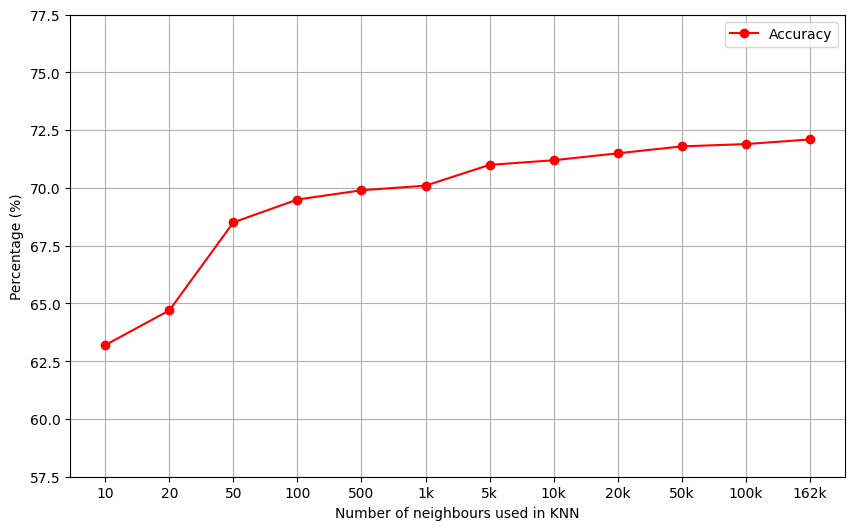

In [2]:
precision=[51.4,52.8,57.9,58.7,57.9,57.8,58.9,58.9,59.2,59.4,59.3,59.9]
recall=[50.0,50.1,53.2,56.2,57.7,59.0,60.5,60.9,61.5,61.8,61.4,61.3]
f1=[49.8,50.9,55.2,57.2,57.6,58.1,59.5,59.7,60.1,60.3,60.1,60.3]

precisionN=[73.2,74.8,78.5,79.4,80.7,81.2,82.1,82.5,82.8,83.4,83.7,83.6]
recallN=[74.7,77.3,81.8,81.0,80.5,79.7,80.0,80.2,80.2,80.6,81.0,81.5]
f1N=[73.7,76.0,80.0,80.2,80.5,80.3,80.8,81.1,81.2,81.8,82.1,82.3]

accuracy=[63.2,64.7,68.51,69.5,69.9,70.1,71.0,71.2,71.5,71.8,71.9,72.1]
import matplotlib.pyplot as plt
import numpy as np

# Generate X values
x_labels = ['10', '20', '50', '100', '500','1k','5k','10k','20k','50k','100k','162k']
x = np.arange(len(x_labels))  # numeric positions for categorical x-axis

# Create multiple Y lines (values between 0-100)


# Plotting multiple lines
plt.figure(figsize=(10, 6))
plt.plot(x,accuracy, label='Accuracy',markersize=6,marker='o',color='red')
# plt.plot(x,recall, label='Recall',markersize=6,marker='o')
# plt.plot(x,f1, label='F1-Score',markersize=6,marker='o')

# Adding labels and title
plt.xticks(ticks=x, labels=x_labels)
plt.xlabel('Number of neighbours used in KNN')
plt.ylabel('Percentage (%)')
# plt.title('Metrics of KNNs trained with different number of samples (non-zero-shot generators)')
plt.ylim(57.5, 77.5)
plt.legend()
plt.grid(True)
plt.savefig('/home/jaime/Desktop/accuracy_KNNs.png', dpi=600,bbox_inches='tight')
plt.show()
